# **Hypothesis 3 - Pollution Levels follow Seasonal Patterns**

## Objectives

* To assess hypothesis 3 - pollution levels follow seasonal patterns

## Inputs

* The csv file "pollution_us_2012_2016-population-weather.csv" 

## Outputs

* Visuals and statistical tests to assess the hypothesis



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\sonia\\Documents\\VS Studio Projects\\US_Air_Pollution_Team_2\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [17]:
os.chdir(r"c:\Users\sonia\Documents\VS Studio Projects\US_Air_Pollution_Team_2")

os.getcwd()

'c:\\Users\\sonia\\Documents\\VS Studio Projects\\US_Air_Pollution_Team_2'

Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\sonia\\Documents\\VS Studio Projects\\US_Air_Pollution_Team_2'

---

## Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import normaltest
import pingouin as pg

---

## Load the Dataset

I will load the dataset using Pandas.

In [5]:
df = pd.read_csv('Dataset/EDA/pollution_us_2012_2016-population-weather.csv') # Reading the CSV file
pd.set_option("display.max_columns", None)
df.head()


,Address,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Population,Latitude,Longitude,tmax,prcp,wspd
0,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-01,17.716667,31.0,0,29,0.013667,0.030,10,25,0.254167,0.5,19,0.0,0.336842,0.6,5,7.0,"542,649",31.9681,-111.7806,26.7,0.0,17.6
1,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-02,15.062500,30.6,18,28,0.015083,0.030,10,25,0.200000,0.6,19,0.0,0.225000,0.4,23,5.0,"542,649",31.9681,-111.7806,24.4,0.0,27.4
2,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-03,21.643478,31.0,18,29,0.011417,0.026,9,22,0.295455,0.7,8,0.0,0.295833,0.4,0,5.0,"542,649",31.9681,-111.7806,26.1,0.0,10.8
3,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-04,25.041668,37.8,10,35,0.009208,0.020,10,17,0.737500,2.1,19,3.0,0.345833,0.5,12,6.0,"542,649",31.9681,-111.7806,24.4,0.0,9.0
4,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-05,21.981817,37.1,17,35,0.013042,0.031,9,26,0.330435,0.8,21,0.0,0.291667,0.6,23,7.0,"542,649",31.9681,-111.7806,23.9,0.0,9.7


In [6]:
df['Date Local'] = pd.to_datetime(df['Date Local'])

---

## Mean Levels of Pollutants Over Time

Previous plots have shown that mean values vary throughout the year in a repeating pattern for some of the pollutants, strongly indicating seasonality.

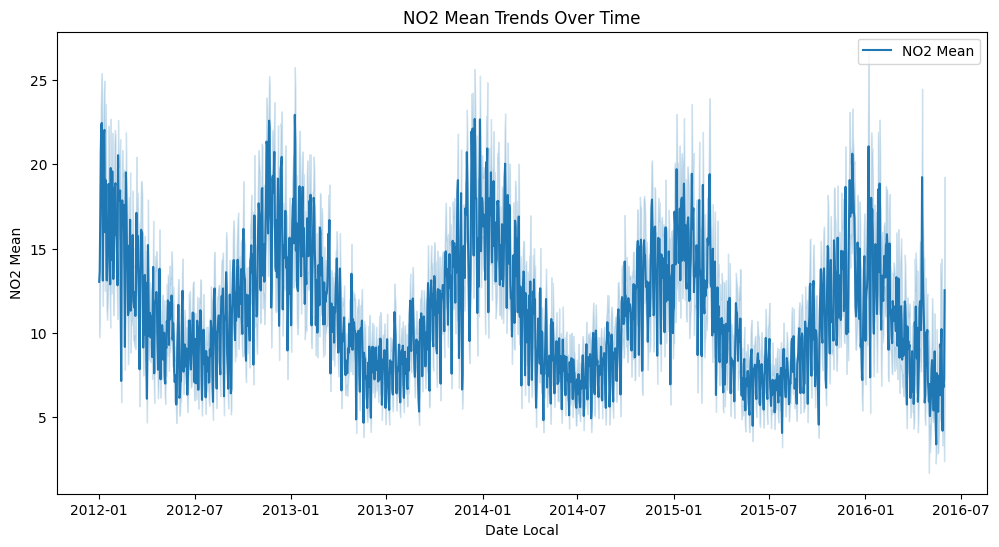

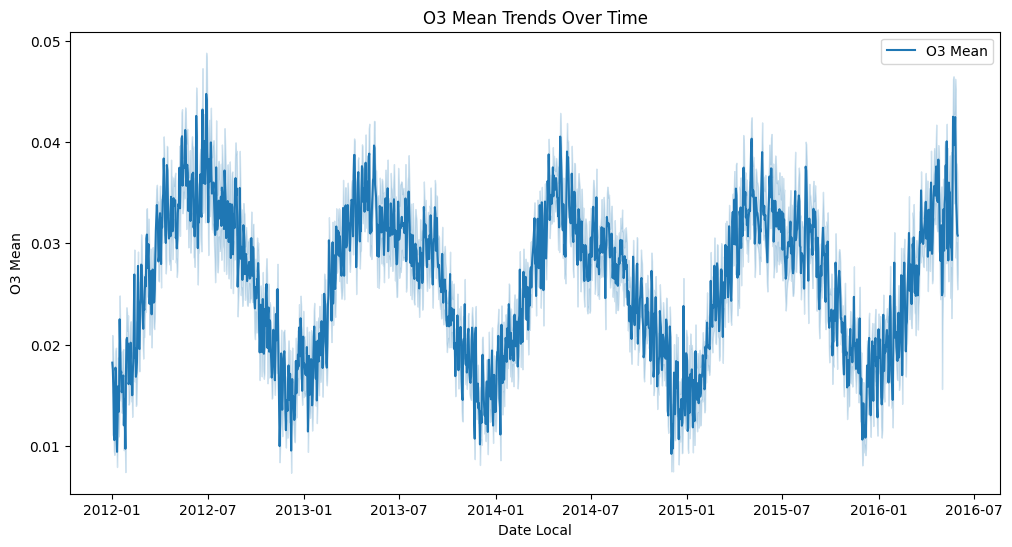

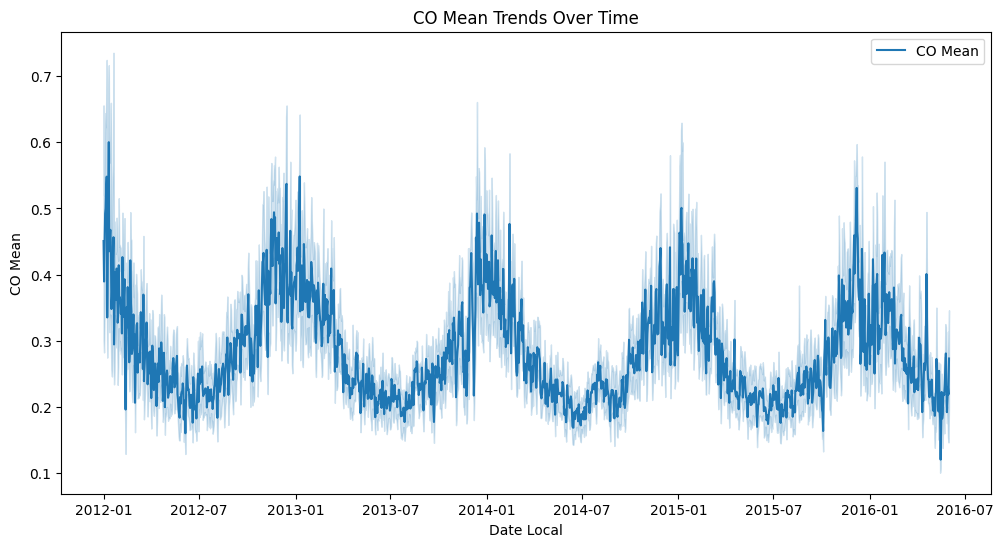

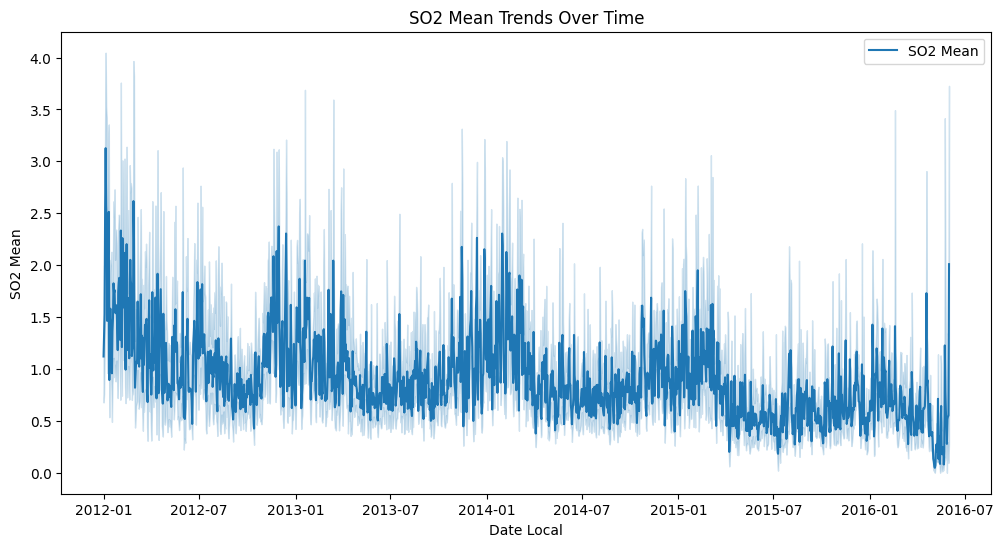

In [9]:
pollutants = ['NO2 Mean', 'O3 Mean', 'CO Mean', 'SO2 Mean']

for col in pollutants:
    plt.figure(figsize=(12,6))
    sns.lineplot(data=df, x='Date Local', y=col, label=f"{col}")
    plt.title(f"{col} Trends Over Time")
    plt.legend()
    plt.show()

These line graphs show really quite regular dips and highs for the mean values of NO2, O3 and CO, which repeat on a yearly cycle. While mean SO2 values also show yearly dips and highs, the extent of these changes is less, while the variance appears high. I can also clearly see the gradual overall decrease in SO2 levels from 2012 to 2016.  

---

## Test for Seasonality

To test for seasonality, I will add both a "Month_Name" and "Season" column using values derived from "Date Local".

In [11]:
df["Month_Name"] = df["Date Local"].dt.month_name()

Now I can map "Month_Name" to "Season"

In [14]:
def get_season(month):
    if month in ["December", "January", "February"]:
        return "Winter"
    elif month in ["March", "April", "May"]:
        return "Spring"
    elif month in ["June", "July", "August"]:
        return "Summer"
    else:
        return "Autumn"

df["Season"] = df["Month_Name"].apply(get_season)

First, I am plotting mean pollutant values by month.

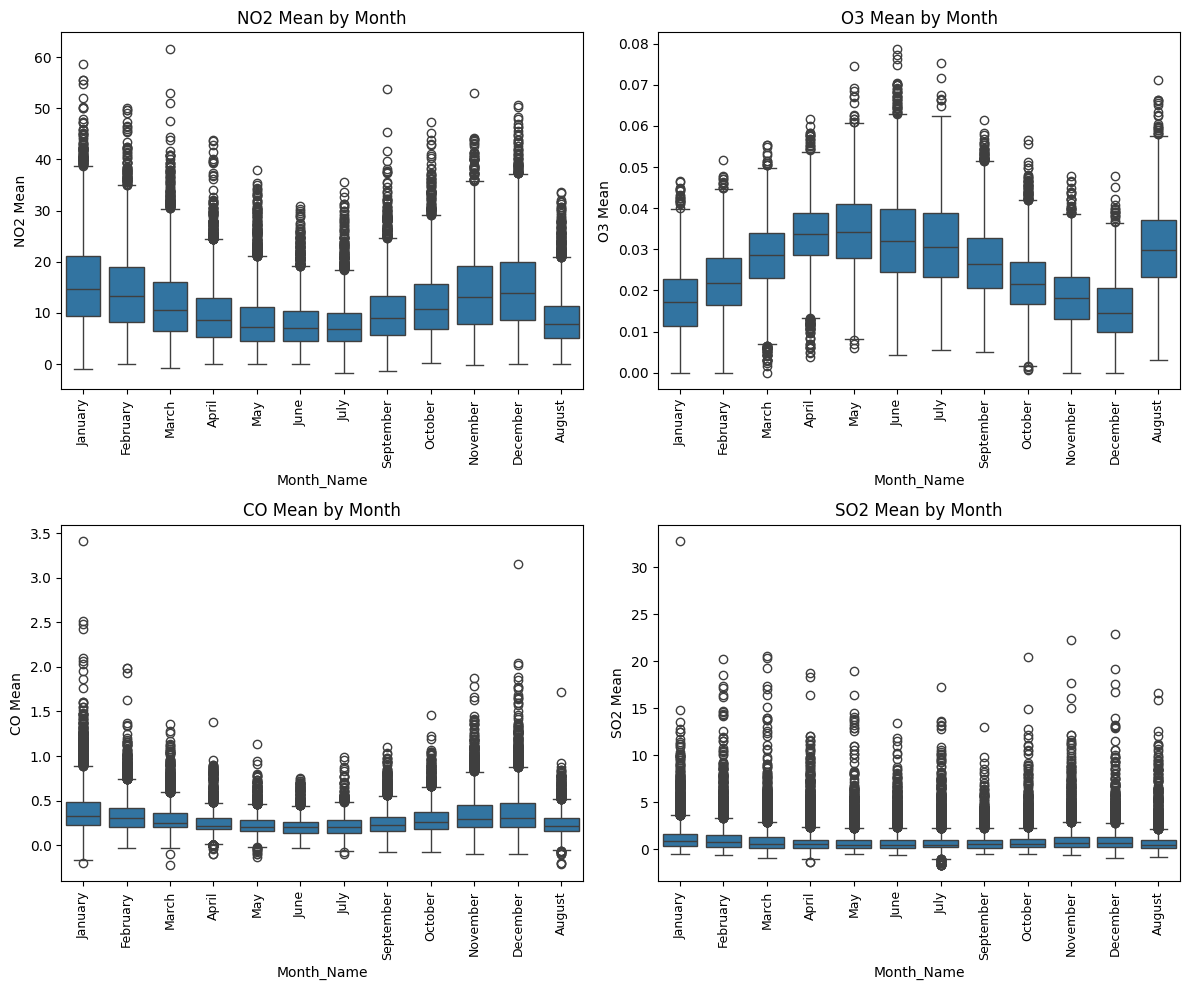

In [16]:
pollutants = ['NO2 Mean', 'O3 Mean', 'CO Mean', 'SO2 Mean']

# Grid size
n = len(pollutants)
ncols = 2
nrows = math.ceil(n / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5*nrows))
axes = axes.flatten()

for idx, col in enumerate(pollutants):
    sns.boxplot(
        x="Month_Name",
        y=col,
        data=df,
        ax=axes[idx]
    )
    axes[idx].set_title(f"{col} by Month")
    axes[idx].set_xlabel("Month_Name")
    axes[idx].set_ylabel(col)
    axes[idx].tick_params(axis="x", rotation=90, labelsize=9)

# Hide unused subplots (if any)
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Here, I can see the changes in mean pollutant levels by month. I can see the clear dip and highs in both NO2 and O3, which show a reverse pattern; highest in summer months for O3 but lowest for NO2. It's harder to visualise changes for CO and SO2.

Below, I will use the non-parametric Kruskal-Wallis test to check for statistical significance between the distributions of pollutant mean values by month. The hull hypothesis is that there are no differences, while the alternate is that there are.

In [22]:
pollutants = ['NO2 Mean', 'O3 Mean', 'CO Mean', 'SO2 Mean']

# Initialize results list
kruskal_results = []

for col in pollutants:
    try:
        # Run Kruskal-Wallis test
        result = pg.kruskal(data=df, dv=col, between="Month_Name")
        
        # Append results with the variable name
        kruskal_results.append({
            'variable': col,
            'H': result['H'].iloc[0],          # test statistic
            'pval': result['p-unc'].iloc[0]    # p-value
        })
    except Exception as e:
        print(f"Could not run Kruskal-Wallis for {col}: {e}")
        kruskal_results.append({
            'variable': col,
            'H': None,
            'pval': None
        })

# Convert results to DataFrame
kruskal_df = pd.DataFrame(kruskal_results).sort_values(by='pval').reset_index(drop=True)

kruskal_df

,variable,H,pval
0,NO2 Mean,8347.828322,0.000000e+00
1,O3 Mean,20614.477362,0.000000e+00
2,CO Mean,5990.320377,0.000000e+00
3,SO2 Mean,1224.110930,1.029414e-255


As p < 0.05 for all pollutants, I can accept the alternate hypothesis; the distribution of mean pollutant levels vary significantly by month. 

Next, I will plot mean pollutant values by season.

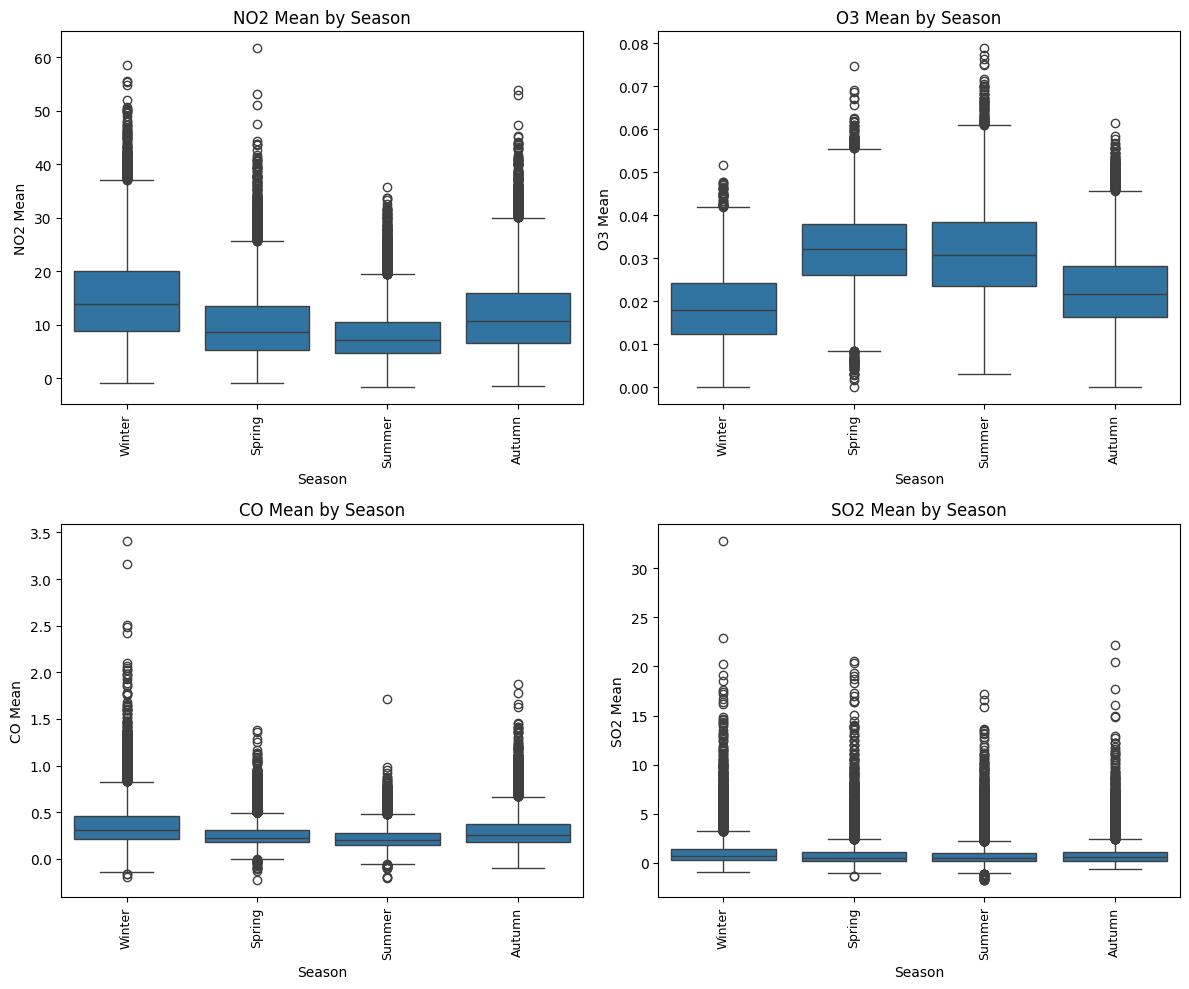

In [17]:
pollutants = ['NO2 Mean', 'O3 Mean', 'CO Mean', 'SO2 Mean']

# Grid size
n = len(pollutants)
ncols = 2
nrows = math.ceil(n / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5*nrows))
axes = axes.flatten()

for idx, col in enumerate(pollutants):
    sns.boxplot(
        x="Season",
        y=col,
        data=df,
        ax=axes[idx]
    )
    axes[idx].set_title(f"{col} by Season")
    axes[idx].set_xlabel("Season")
    axes[idx].set_ylabel(col)
    axes[idx].tick_params(axis="x", rotation=90, labelsize=9)

# Hide unused subplots (if any)
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Once again, I can see clear seasonal differences in NO2 and O3. While it is harder to see season changes for CO and SO2, the dip during spring and summer is visible.

Below, I will use Kruskal-Wallis to test for statistical significance between seasonal distributions for each pollutant.

In [23]:
pollutants = ['NO2 Mean', 'O3 Mean', 'CO Mean', 'SO2 Mean']

# Initialize results list
kruskal_results = []

for col in pollutants:
    try:
        # Run Kruskal-Wallis test
        result = pg.kruskal(data=df, dv=col, between="Season")
        
        # Append results with the variable name
        kruskal_results.append({
            'variable': col,
            'H': result['H'].iloc[0],          # test statistic
            'pval': result['p-unc'].iloc[0]    # p-value
        })
    except Exception as e:
        print(f"Could not run Kruskal-Wallis for {col}: {e}")
        kruskal_results.append({
            'variable': col,
            'H': None,
            'pval': None
        })

# Convert results to DataFrame
kruskal_df = pd.DataFrame(kruskal_results).sort_values(by='pval').reset_index(drop=True)

kruskal_df

,variable,H,pval
0,NO2 Mean,6895.906227,0.000000e+00
1,O3 Mean,17157.767308,0.000000e+00
2,CO Mean,4875.057737,0.000000e+00
3,SO2 Mean,856.873209,2.001018e-185


As p < 0.05 for all pollutants, I can accept the alternate hypothesis; the distribution of mean pollutant levels vary significantly by season. 

---

## Conclusion and Next Steps

* The mean level of each pollutant varies by month and season
* Similar to the findings for maximum temperature, O3 peaks in summer months, while the opposite is true for the other pollutants